<a href="https://colab.research.google.com/github/FLC-ML/practicespace/blob/swimmer-practice-1/Time_Series_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN/LSTM Time Series Classification.

Proof of concept.

# Load Data

In [1]:
# Training Data
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AACaXFPq1qA5kLvhIF0Y0NfEa/y_reference.npy
# Testing Data
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AABKsseO9QvObI4lTt-yXg8ta/X_test.npy
!wget https://www.dropbox.com/sh/gmgduvzyl5tken6/AACitgFQG5cfd7qs--swRbI0a/y_test.npy

--2020-07-07 20:03:22--  https://www.dropbox.com/sh/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy [following]
--2020-07-07 20:03:22--  https://www.dropbox.com/sh/raw/gmgduvzyl5tken6/AAD6E17hrD8CfKwmRB9wfTKqa/X_reference.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc37364cda3503b19cc32a0c4d68.dl.dropboxusercontent.com/cd/0/inline/A7EjQRVN30B8uEvYErx1mrbGGSw60zY1XS_M8txVT-NSABZNWxxtovUoE0MPHyoXbWw3QaGI0EfM8QSooFUTuskqZLXYsXoV5Oy7HfcPeQ5qVyuAPgHEtUEGtZuBal_ANj4/file# [following]
--2020-07-07 20:03:23--  https://uc37364cda3503b19cc32a0c4d68.dl.dropboxusercontent.com/cd/0/inline/A7EjQRVN30B8uEvYErx1m

In [2]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Dense, Flatten, GlobalMaxPool1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.metrics import confusion_matrix
import itertools

import numpy as np
import matplotlib.pyplot as plt # Use pip install to get this outside of notebook
from matplotlib import cm
import pandas as pd

In [3]:
# If you want to check directory.
!ls

sample_data  X_reference.npy  X_test.npy  y_reference.npy  y_test.npy


training set shape: (60000, 1000) (60000,)
test set shape: (3000, 1000) (3000,)

new x_train shape: (60000, 1000, 1)
new x_test shape: (3000, 1000, 1)

X_data index shape: (1000, 1)
(array([   0,    1,    2, ..., 1997, 1998, 1999]),)
(array([2000, 2001, 2002, ..., 3997, 3998, 3999]),)


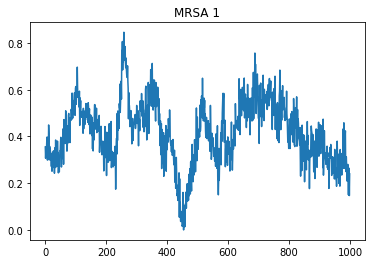

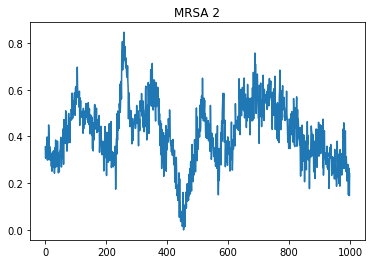

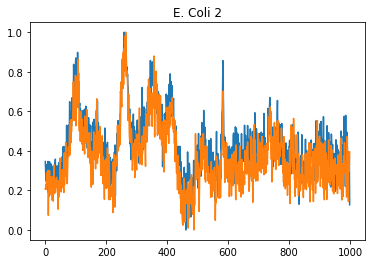

In [48]:
### Load the data:

# Training data
X_train_loc = 'X_reference.npy'
y_train_loc = 'y_reference.npy'
X_train = np.load(X_train_loc)
y_train = np.load(y_train_loc)

# Testing data
X_test_loc = 'X_test.npy'
y_test_loc = 'y_test.npy'
X_test = np.load(X_test_loc)
y_test = np.load(y_test_loc)

# Print shape of data loaded.
print("training set shape:", X_train.shape, y_train.shape)
print("test set shape:", X_test.shape, y_test.shape)

# The data is only 2D
X_train = np.expand_dims(X_train, -1) 
X_test = np.expand_dims(X_test, -1)
print("\nnew x_train shape:", X_train.shape)
print("new x_test shape:", X_test.shape)
print("\nX_data index shape:", X_train[0].shape)

# Display where labels begin and end.
MRSA1 = np.where(y_train==0)
MRSA2 = np.where(y_train==1)
print(MRSA1)
print(MRSA2)

# Example Plots of signals
plt.figure()
plt.title("MRSA 1")
plt.plot(X_train[0])
plt.figure()
plt.title("MRSA 2")
plt.plot(X_train[0])
plt.figure()
plt.title("E. Coli 2")
plt.plot(X_train[19000])
plt.plot(X_train[19005])

UPDATE: The labels are changing every 2000 spectra! 30,000 spectra for each isolate.

In [5]:
### Build the Model
i = Input(shape=X_train[0].shape)
x = LSTM(15, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)
x = Dropout(0.5)(x)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(30, activation='softmax')(x)

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000, 1)]         0         
_________________________________________________________________
lstm (LSTM)                  (None, 1000, 15)          1020      
_________________________________________________________________
global_max_pooling1d (Global (None, 15)                0         
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense (Dense)                (None, 1000)              16000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                30030 

In [7]:
### Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)


1875/1875 [==============================] - 233s 124ms/step - loss: 2.8118 - accuracy: 0.1451 - val_loss: 3.3939 - val_accuracy: 0.0860


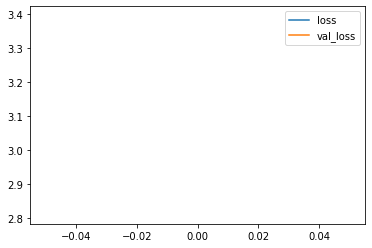

In [8]:
### Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

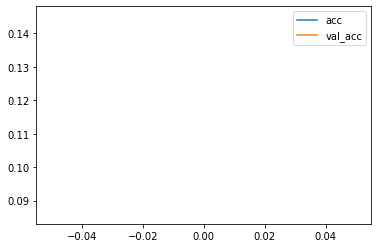

In [9]:
### Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[26  0  3  0  0 12  1  0  0  0  0  1  1  8  0  5  0  0  0  0  8 22  0  0
   5  6  2  0  0  0]
 [12  1  0  0  0  3  0  0  0  0  0  0  0  2  0  0  0  0  0  0 13 69  0  0
   0  0  0  0  0  0]
 [ 0  0 12  5  0  0  0  0  0  4  0 39  0  0  0 25  0  0  0  0 13  1  0  0
   1  0  0  0  0  0]
 [ 3  0 22  0  0  5  0  0  0  8  0  2  0  0  0  5  0  0  0  0 28  4  0  0
   3  6 13  0  0  1]
 [ 1  0 25  2  0  2  0  0  0  8  0 16  0  1  0 11  0  0  0  0  8  1  0  0
   8  1 15  0  0  1]
 [21 16  0  0  0  2  0  0  0  0  0  0  0  7  0  0  0  0  0  0  1 49  0  0
   4  0  0  0  0  0]
 [ 0  0  4  0  0  2  0  0  0  0  0 48  1  1  0  7  0  0  0  0  1  0  0  0
  21  2  8  0  0  5]
 [ 0  0  0  0  0  0  0  0  0  0  0 85  0  0  0  2  0  0  0  0  0  0  0  0
   9  1  0  0  0  3]
 [ 0  0  5  0  0  0  0  0  0  2  0 65  0  0  0 18  0  0  0  0  1  0  0  0
   5  0  4  0  0  0]
 [ 0  0  7  0  0  3  0  0  0  1  0 31  0  0  0 18  0  0  0  0  6  0  0  0
  16  1 13  0  0  4]
 [ 1  0 10

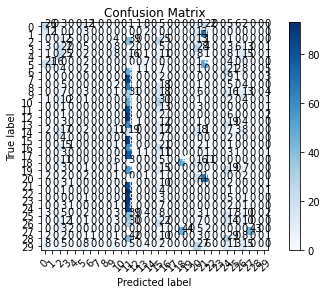

(30, 30)

In [10]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(30)))

cm.shape

In [11]:
# Label mapping
labels = '''MRSA1
MRSA2
MSSA1
MSSA2
MSSA3
S.epidermidis
S.lugdunensis
S.pneumoniae1
S.pneumoniae2
GroupA_Strep
GroupB_Strep
GroupC_Strep
GroupG_Strep
S.sanguinis
E.faecalis1
E.faecalis2
E.faecium
E.coli_1
E.coli_2
K.pneumoniae_1
K.pneumoniae_2
K.aerogenes
E.cloacae
P.mirabilis
S.marcescens
S.enterica
P.aeruginosa_1
P.aeruginosa_2
C.albicans
C.glabrata'''.split()

2672
<class 'numpy.int64'>
<class 'numpy.int64'>


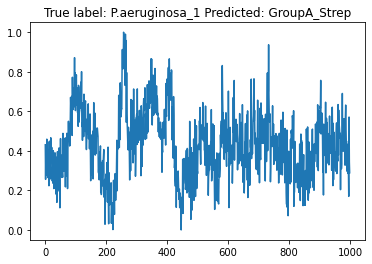

In [32]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
print(i)
print(type(i))
# Changing float64 to int64
new_i = i.astype(int)
y_testnew = y_test.astype(int)
p_testnew = p_test.astype(int)
print(type(new_i))
plt.plot(X_test[new_i])
plt.title("True label: %s Predicted: %s" % (labels[y_testnew[new_i]], labels[p_testnew[new_i]]));